In [0]:
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install pandas_ml

     |████████████████████████████████| 102kB 2.7MB/s 


In [0]:
# Pacotes de Manipulação de Dados
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Keras e TensorFlow
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, Dropout, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf

# Pacotes para Confusion Matrix e Balanceamento de Classes
import pandas_ml as pdml
import imblearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
df = pd.read_csv('drive/My Drive/datasets/creditcard.csv', low_memory = False)
df['Class'] = df['Class'].apply(lambda s: int(s.replace("'","")))
X = df.iloc[:,:-1]
y = df['Class']

In [0]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("Temos", len(frauds), "pontos de dados como fraude e", len(non_frauds), "pontos de dados considerados normais.")

Temos 492 pontos de dados como fraude e 284315 pontos de dados considerados normais.


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print("Tamanho do Dataset de Treino: ", X_train.shape)

Tamanho do Dataset de Treino:  (190820, 30)


In [0]:
model = Sequential()
model.add(Dense(30, input_dim = 30, activation = 'relu'))     
model.add(Dense(1, activation = 'sigmoid'))                
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X_train.as_matrix(), y_train, epochs = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Epoch 1/1
190820/190820 [==============================] - 7s 39us/step - loss: 1.1919 - acc: 0.9252


In [0]:
print("Erro/Acurácia: ", model.evaluate(X_test.as_matrix(), y_test, verbose = 0))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Erro/Acurácia:  [0.025556842991526142, 0.9984146743698596]


In [0]:
y_predicted = model.predict(X_test.as_matrix()).T[0].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Confusion matrix:
Predicted      0  1  __all__
Actual                      
0          93838  0    93838
1            149  0      149
__all__    93987  0    93987


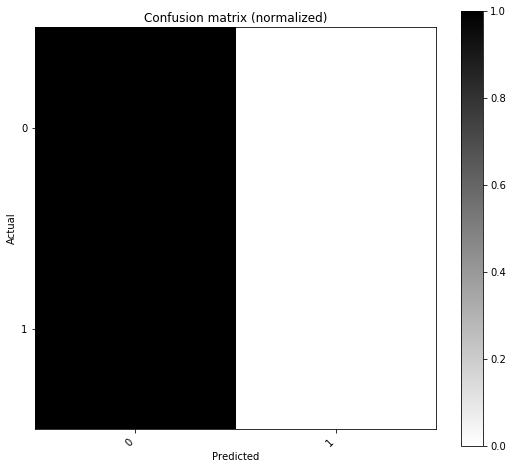

Confusion Matrix:

Predicted      0  1  __all__
Actual                      
0          93838  0    93838
1            149  0      149
__all__    93987  0    93987


Overall Statistics:

Accuracy: 0.9984146743698596
95% CI: (0.9981389650810484, 0.9986588455019066)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0           1
Population                                  93987       93987
P: Condition positive                       93838         149
N: Condition negative                         149       93838
Test outcome positive                       93987           0
Test outcome negative                           0       93987
TP: True Positive                           93838           0
TN: True Negative                               0       93838
FP: False Positive                            149           0
FN: False Negative                              0         149
TPR

In [0]:
from pandas_ml import ConfusionMatrix
import warnings
warnings.filterwarnings('ignore')
y_right = np.array(y_test)
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

df2 = pdml.ModelFrame(X, target=y)
sampler = df2.imbalance.over_sampling.SMOTE()
oversampled = df2.fit_sample(sampler)
X2, y2 = oversampled.iloc[:,:-1], oversampled['Class']

data = scale(X2)
pca = PCA(n_components = 10)
X2 = pca.fit_transform(data)
X2

array([[ -2.30757419,   0.09741477,   0.33934667, ...,  -1.56934936,
         -0.01691196,   0.62002261],
       [ -2.20936842,   0.48816764,   0.31401344, ...,  -0.81936449,
         -0.41829069,   0.74466229],
       [ -2.41119784,  -0.24634807,  -0.12466763, ...,  -1.90734566,
         -1.21990004,   0.39674834],
       ...,
       [ 10.25914641, -10.63222632,  -4.70722361, ...,  -1.75418887,
          0.88870289,   0.33736889],
       [  4.01379321,  -0.49987762,  -0.66368379, ...,  -1.14278594,
         -0.22127493,  -0.65621395],
       [  1.32089458,   0.54864195,   0.1702663 , ...,  -0.1367015 ,
          0.26897373,   0.34000351]])

In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2.as_matrix(), test_size = 0.33, random_state = 42)

In [0]:
model2 = Sequential()
model2.add(Dense(10, input_dim = 10, activation = 'tanh')) 
model2.add(Dense(27, activation = 'tanh'))
model2.add(Dense(16, activation = 'tanh'))
model2.add(Dense(2, activation = 'tanh'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 27)                297       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                448       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
Total params: 892
Trainable params: 892
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2.fit(X2_train, y2_train, epochs = 2)

Epoch 1/2
380982/380982 [==============================] - 16s 42us/step - loss: 0.0229 - acc: 0.9942
Epoch 2/2
380982/380982 [==============================] - 15s 41us/step - loss: 0.0089 - acc: 0.9969


In [0]:
print("Loss: ", model2.evaluate(X2_test, y2_test, verbose=0))

Loss:  [0.007472291928078142, 0.9974580064802183]


In [0]:
y2_predicted = np.round(model2.predict(X2_test)).T[0]
y2_correct = np.array(y2_test)

In [0]:
np.setdiff1d(y2_predicted, y2_correct)

array([], dtype=float32)

In [0]:
false_neg = 0
false_pos = 0
incorrect = 0
total = len(y2_test)
for i in range(len(y2_test)):
    if y2_predicted[i] != y2_correct[i]:
        incorrect += 1
        if y2_correct[i] == 1 and y2_predicted[i] == 0:
            false_neg += 1
        else:
            false_pos += 1

inaccuracy = incorrect / total

print('Inacurácia:', inaccuracy)
print('Acurácia:', 1 - inaccuracy)
print('Taxa de Falsos Negativos:', false_neg/incorrect)
print('Taxa de Falsos Positivos:', false_pos / incorrect )
print('Falsos Negativos/total:', false_neg/total)

Inacurácia: 0.002541993519781719
Acurácia: 0.9974580064802183
Taxa de Falsos Negativos: 0.44025157232704404
Taxa de Falsos Positivos: 0.559748427672956
Falsos Negativos/total: 0.0011191166439290586


Confusion matrix:
Predicted  False   True  __all__
Actual                          
False      93508    267    93775
True         210  93663    93873
__all__    93718  93930   187648


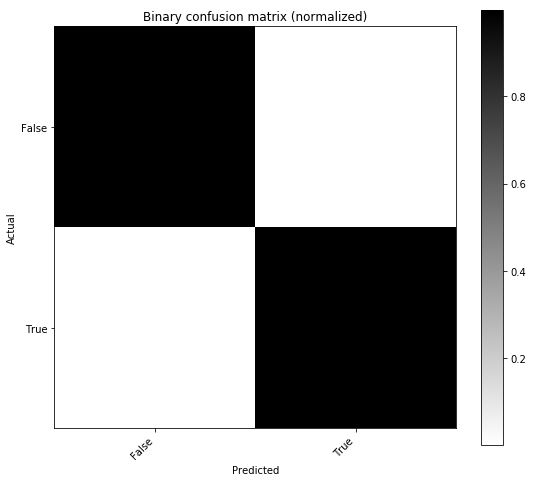

population: 187648
P: 93873
N: 93775
PositiveTest: 93930
NegativeTest: 93718
TP: 93663
TN: 93508
FP: 267
FN: 210
TPR: 0.9977629350292416
TNR: 0.9971527592641962
PPV: 0.997157457681252
NPV: 0.9977592351522653
FPR: 0.0028472407358037855
FDR: 0.0028425423187480037
FNR: 0.002237064970758365
ACC: 0.9974580064802183
F1_score: 0.9974601044711746
MCC: 4.550268450398732
informedness: 0.9949156942934378
markedness: 0.9949166928335171
prevalence: 0.5002611272169167
LRP: 350.4315327054949
LRN: 0.0022434526204481507
DOR: 156201.88699839485
FOR: 0.0022407648477346933


In [0]:
confusion_matrix2 = ConfusionMatrix(y2_correct, y2_predicted)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()